In [4]:
# 1. Install required packages
!pip install numpy matplotlib tensorflow opencv-python --quiet

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [5]:
# 2. Generate synthetic dataset
def create_dataset(num_samples=100, img_size=(64, 64)):
    """Create synthetic before/after image pairs with deforestation"""
    # Healthy forest images (green dominant)
    forest = np.zeros((num_samples, *img_size, 3))
    forest[..., 1] = np.random.uniform(0.5, 0.9, (num_samples, *img_size))  # Green channel

    # Deforested images (brown dominant)
    deforested = forest.copy()
    deforested[..., 0] = np.random.uniform(0.4, 0.7, (num_samples, *img_size))  # Red
    deforested[..., 1] = np.random.uniform(0.2, 0.5, (num_samples, *img_size))  # Reduced green
    deforested[..., 2] = np.random.uniform(0.1, 0.3, (num_samples, *img_size))  # Blue

    return forest, deforested

# Create dataset
X_before, X_after = create_dataset()

In [6]:
# 3. Build and train model
def build_model(input_shape):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        MaxPooling2D((2,2)),
        UpSampling2D((2,2)),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        UpSampling2D((2,2)),
        Conv2D(3, (3,3), activation='sigmoid', padding='same')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Prepare training data
X_train = np.concatenate([X_before, X_after], axis=-1)  # Combine along channels
y_train = X_after  # Target is the 'after' image

model = build_model((64, 64, 6))
model.fit(X_train, y_train, epochs=10, batch_size=8, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - loss: 0.0185
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.0073
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - loss: 0.0066
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - loss: 0.0064
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - loss: 0.0063
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - loss: 0.0062
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0061
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - loss: 0.0061
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - loss: 0.0061
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0061


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


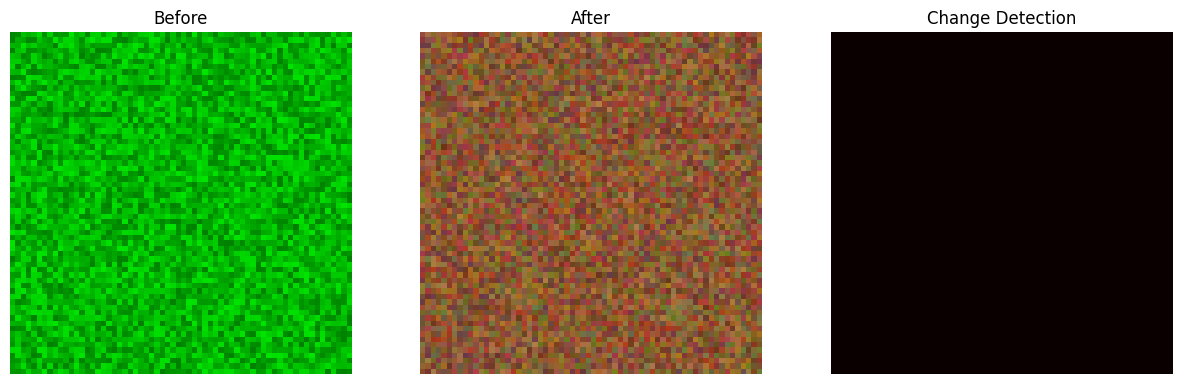

=== TASK 3 COMPLETED SUCCESSFULLY ===


In [7]:
# 4. Change detection and visualization
def detect_changes(before, after, threshold=0.3):
    combined = np.concatenate([before[np.newaxis,...], after[np.newaxis,...]], axis=-1)
    reconstructed = model.predict(combined)[0]
    diff = np.mean(np.abs(after - reconstructed), axis=-1)
    return (diff > threshold).astype('float32')

def plot_comparison(before, after, mask):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(before)
    plt.title('Before')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(after)
    plt.title('After')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(mask, cmap='hot')
    plt.title('Change Detection')
    plt.axis('off')
    plt.show()

# Test with sample images
sample_idx = 85  # Pick a deforested sample
change_mask = detect_changes(X_before[sample_idx], X_after[sample_idx])
plot_comparison(X_before[sample_idx], X_after[sample_idx], change_mask)

print("=== TASK 3 COMPLETED SUCCESSFULLY ===")